In [1]:
cd Desktop/

/Users/uw-user/Desktop


In [2]:
ls


Chimera.app/
Constant_Voltage_Working_Setup_testing /
Conversion_Gromacs_XML/
Fall_2024_Coursework/
Fixed_Voltage_OpenMM/
Forcefield_xml_files/
GCMC_SBA15_UA/
GEMC_Propane_UA/
InterMol/
Kapoor_Lab_Files_Projects/
ML-DL_From-Scratch/
MS_Thesis_Research/
Math_Theory_of_probability/
Ovito.app/
Personal_Folder_Materials/
Printouts for Indian_Travel/
Propane_Gas_Phase_Analysis_GAFF/
Sample_SOPs_for_PhD/
Screenshot 2025-01-29 at 6.35.27 PM.png
Screenshot 2025-02-13 at 6.00.47 PM.png
Screenshot 2025-02-19 at 12.35.32 PM.png
SoC-Faculty-Fellow-DEI-Project-main/
Spring 2025_Coursework /
Stat_Thermo_MD_Theory/
Stochastic_Modeling_Spring_2025/
University of Amsterdam/
VMD 1.9.4a57-arm64-Rev12.app/
image.png
uwyo-computational-biology-workshop-2024-main/


In [3]:
cd Stochastic_Modeling_Spring_2025/

/Users/uw-user/Desktop/Stochastic_Modeling_Spring_2025


In [4]:
ls

HW-Stochastic Modeling_1.pdf            Stefan_Heinz_Mathematical_Modeling.pdf
HW_1_SM_Code_Derivation.pdf             temp.dat
SM-1.pdf                                temperature_plot.png
SM-2.pdf


21.89525622 0.36563944593731157


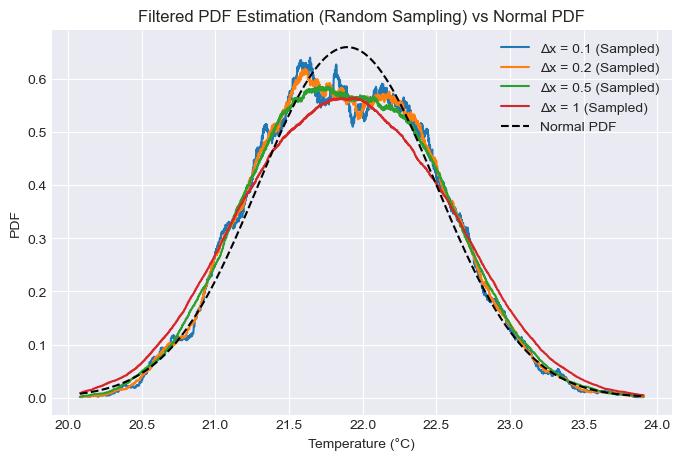

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load temperature data
temperature_data = np.loadtxt("temp.dat")

# Define parameters
np.random.seed(42)  # For reproducibility
N_sample = 10000  # Number of random samples
sampled_data = np.random.choice(temperature_data, N_sample, replace=False)

# Define Δx values
delta_x_values = [0.1, 0.2, 0.5,1]
x_values = np.linspace(np.min(sampled_data), np.max(sampled_data),10000)

# Compute filtered PDFs
pdf_sampled_results = {}

for delta_x in delta_x_values:
    pdf_sampled = np.zeros_like(x_values)
    
    for i, x in enumerate(x_values):
        delta_N = np.sum((sampled_data >= (x - delta_x / 2)) & 
                         (sampled_data <= (x + delta_x / 2)))
        pdf_sampled[i] = delta_N / (N_sample * delta_x)
    
    pdf_sampled_results[delta_x] = pdf_sampled

# Plot the PDFs
plt.figure(figsize=(8, 5))
for delta_x in delta_x_values:
    plt.plot(x_values, pdf_sampled_results[delta_x], label=f"Δx = {delta_x} (Sampled)") 

mean_temp, var_temp = np.mean(sampled_data), np.var(sampled_data)
normal_pdf = norm.pdf(x_values, mean_temp, np.sqrt(var_temp))
plt.plot(x_values, normal_pdf, 'k--', label="Normal PDF")
print(mean_temp, (var_temp))
#plt.savefig("normal_distribution_plot.png", dpi=300, bbox_inches='tight')


plt.xlabel("Temperature (°C)")
plt.ylabel("PDF")
plt.legend()
plt.title("Filtered PDF Estimation (Random Sampling) vs Normal PDF") 
plt.savefig("problem_2_plot.png", dpi=300, bbox_inches='tight')
#plt.grid()
plt.show() 

In [38]:
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
skewness = skew(sampled_data)
flatness = kurtosis(sampled_data, fisher = False)  # Fisher=False returns Pearson's definition

print(f'Skewness: {skewness:.2f}')
print(f'Flatness (Kurtosis): {flatness:.2f}')

Skewness: 0.08
Flatness (Kurtosis): 2.60


(50400,)


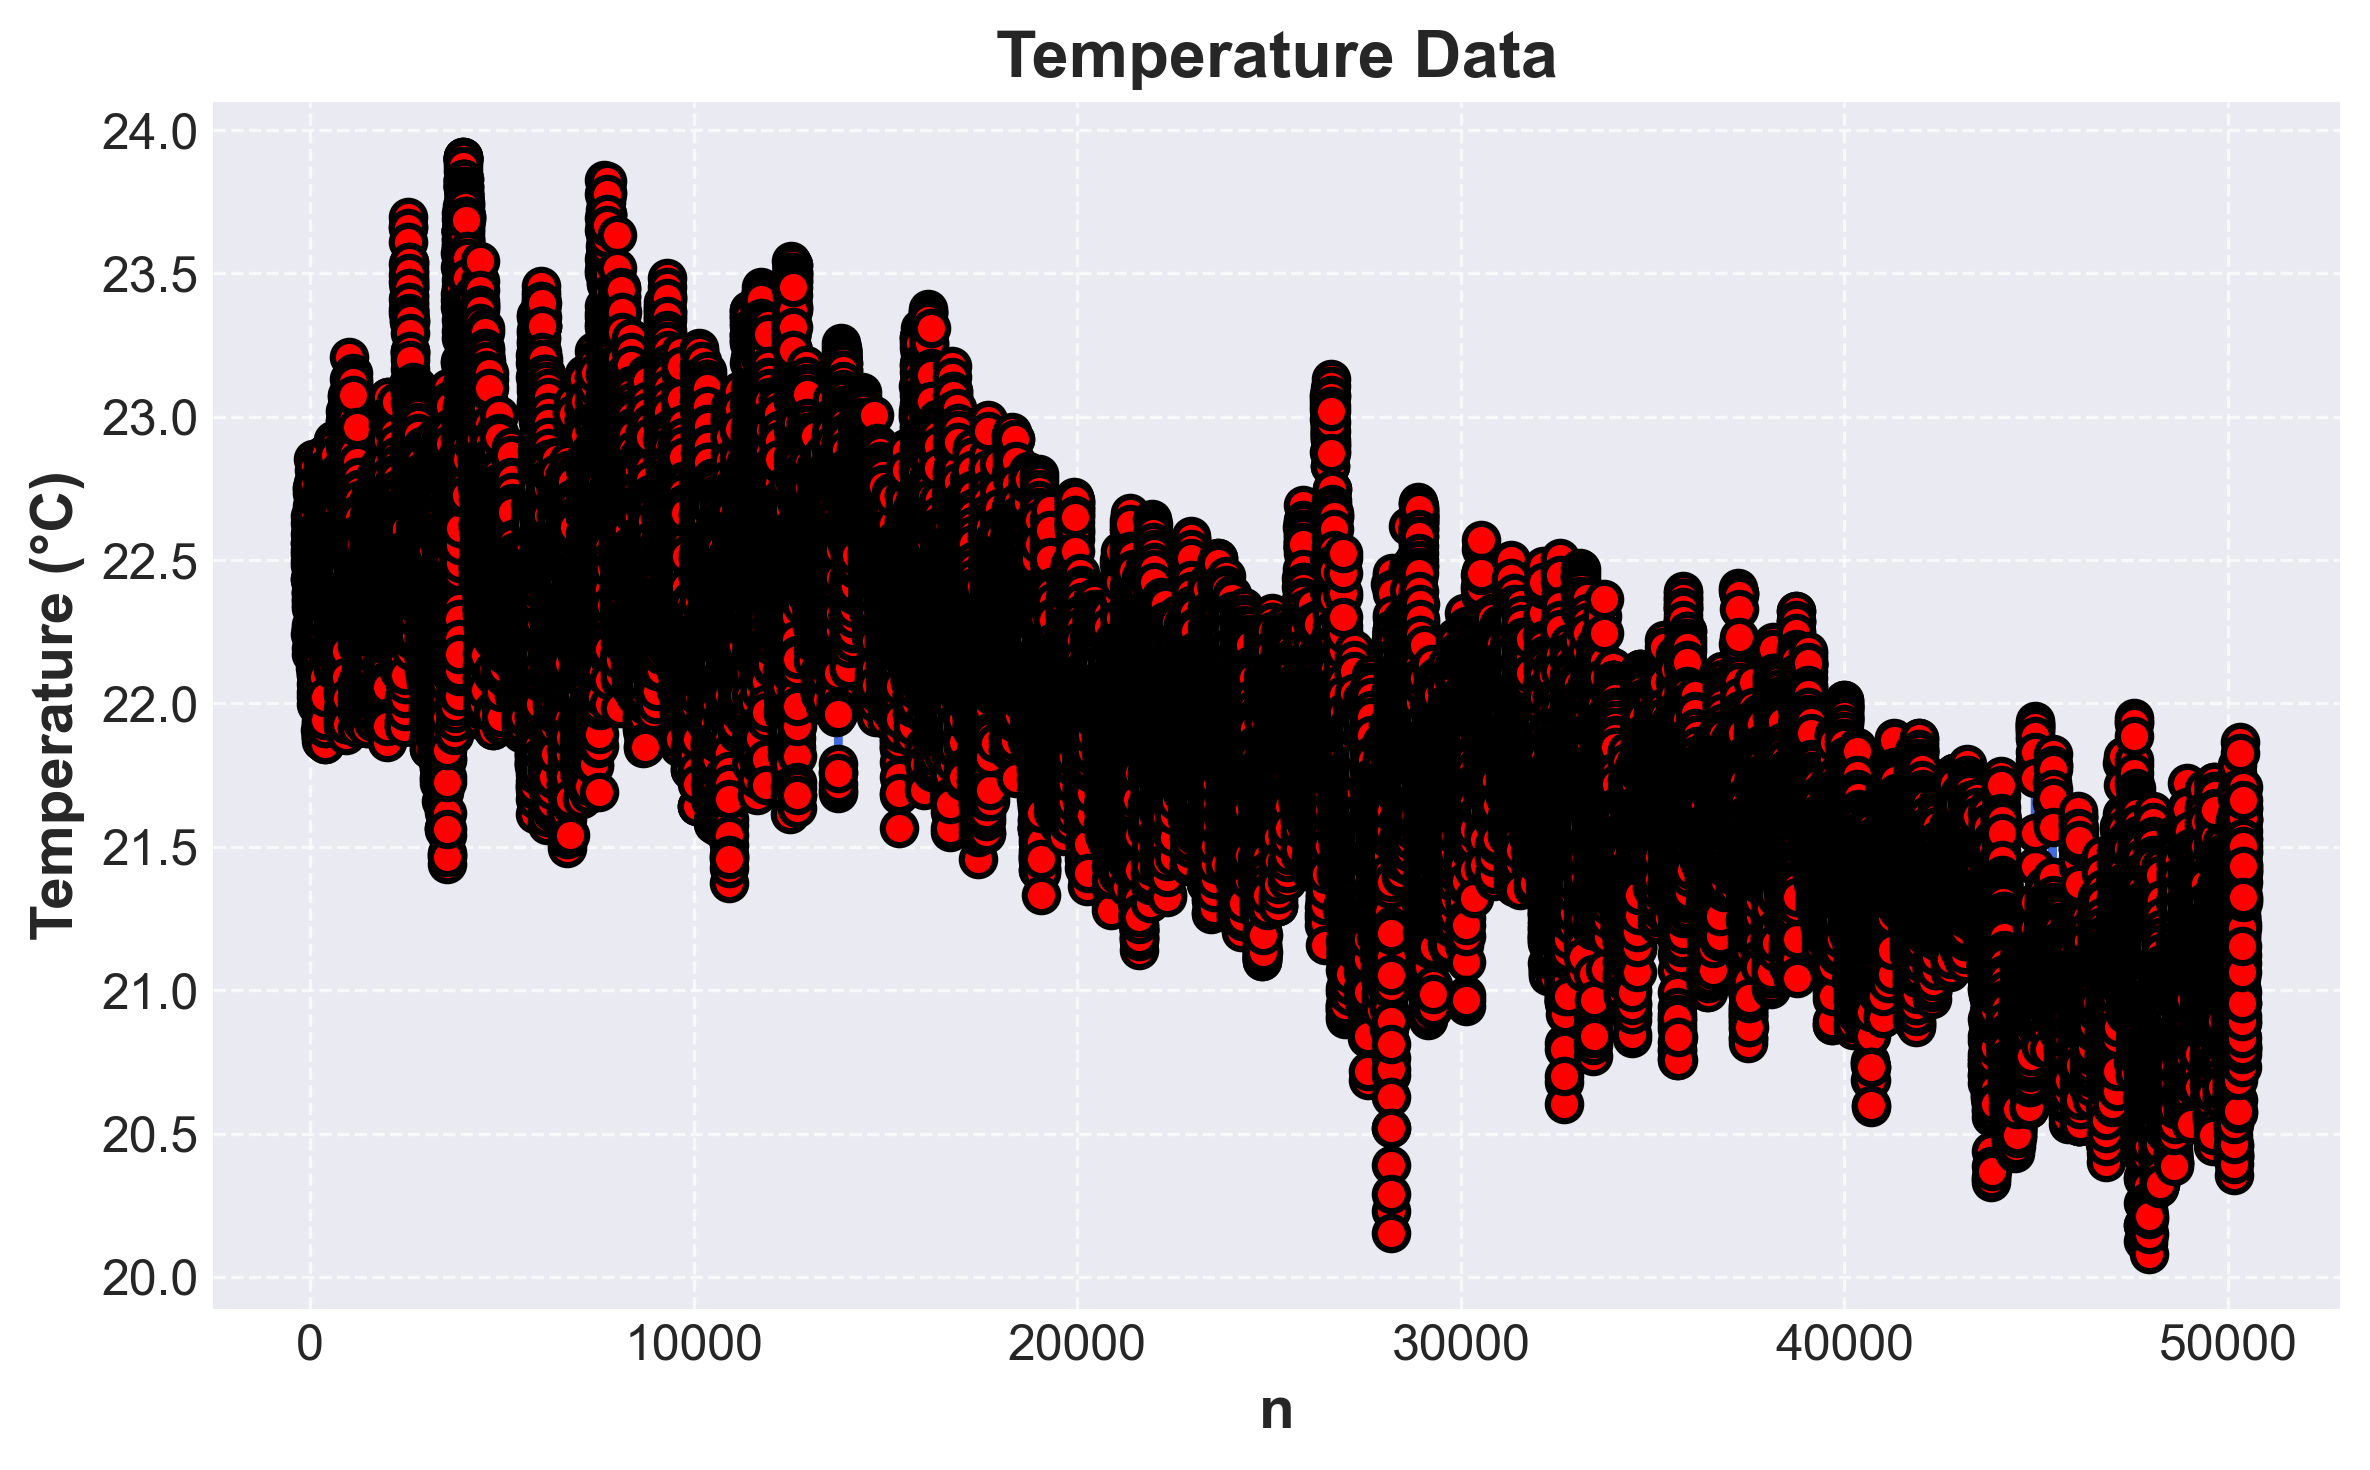

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
temperature_data = np.loadtxt("temp.dat")

# Check the shape of the data
print(temperature_data.shape)

# Set figure size and style
plt.figure(figsize=(8, 5), dpi=300)  # High DPI for publication
plt.style.use('seaborn-v0_8-darkgrid')  # Aesthetic style

# Plot data with enhanced visualization
plt.plot(temperature_data, marker='o', linestyle='-', markersize=8, linewidth=2, 
         color='royalblue', markerfacecolor='red', markeredgewidth=1.5, markeredgecolor='black')

# Labels and title
plt.xlabel("n", fontsize=14, fontweight='bold')
plt.ylabel("Temperature (°C)", fontsize=14, fontweight='bold')
plt.title("Temperature Data", fontsize=16, fontweight='bold')

# Additional customization
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout

# Save as PNG with high resolution
plt.savefig("temperature_plot.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


21.89525622 0.36563944593731157


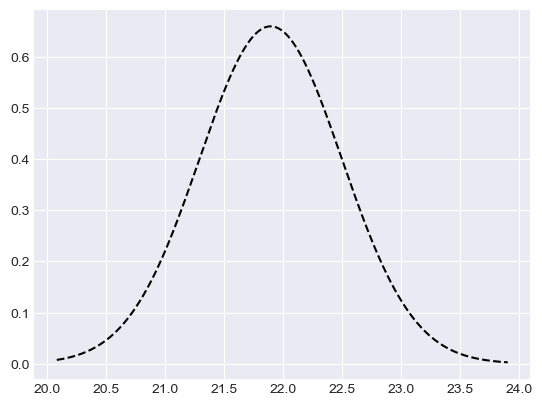

In [56]:
mean_temp, var_temp = np.mean(sampled_data), np.var(sampled_data)
normal_pdf = norm.pdf(x_values, mean_temp, np.sqrt(var_temp))
plt.plot(x_values, normal_pdf, 'k--', label="Normal PDF")
print(mean_temp, (var_temp))
plt.savefig("normal_distribution_plot.png", dpi=300, bbox_inches='tight')

<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\m'
<>:20: SyntaxWarning: invalid escape sequence '\s'
/var/folders/tw/7h5pbl6936728wzt4stt70680000gr/T/ipykernel_44476/668576104.py:20: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, pdf, label=f"Normal Distribution ($\mu$ = {mean:.2f}, $\sigma$ = {std_dev:.2f})", color="blue")
/var/folders/tw/7h5pbl6936728wzt4stt70680000gr/T/ipykernel_44476/668576104.py:20: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, pdf, label=f"Normal Distribution ($\mu$ = {mean:.2f}, $\sigma$ = {std_dev:.2f})", color="blue")


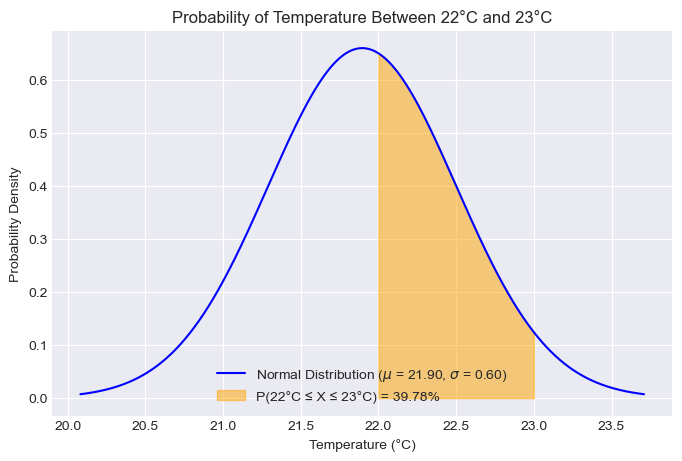

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given data
mean = 21.89525622
variance = 0.36563944593731157
std_dev = np.sqrt(variance)

# Define the range for the plot
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 1000)  # 3 standard deviations around the mean
pdf = norm.pdf(x, mean, std_dev)  # Probability density function

# Define the range for shading (22°C to 23°C)
x_fill = np.linspace(22, 23, 1000)
pdf_fill = norm.pdf(x_fill, mean, std_dev)

# Plot the normal distribution
plt.figure(figsize=(8, 5))
plt.plot(x, pdf, label=f"Normal Distribution ($\mu$ = {mean:.2f}, $\sigma$ = {std_dev:.2f})", color="blue")

# Shade the area between 22°C and 23°C
plt.fill_between(x_fill, pdf_fill, color="orange", alpha=0.5, label="P(22°C ≤ X ≤ 23°C) = 39.78%")

# Add labels and title
plt.title("Probability of Temperature Between 22°C and 23°C")
plt.xlabel("Temperature (°C)")
plt.ylabel("Probability Density")
plt.legend()
#plt.grid(True)
plt.savefig("normal_distribution_probability_finding_plot.png", dpi=300, bbox_inches='tight')
# Show the plot
plt.show()